# Benchamark bootstrap summary
We should check invariants and make alarms in case of non probable fit values
Normal fit with init weigths  - All params,  and errors  + true value + corresponding plots 

## Tests:
* timing
* precision and error estimates:
  * Test 1.) - average of  N  <fits-true>  with weight one  - expected value is 0    
    * error of <fits-true> ~ rmsexp/sqrt(N)
  * Test 2.) RMS of N <fits-true>  with with weight one  - expected value covariance estimate  
  * Test 3.) Pulls <fit-true>/rmsexp


In [1]:
import pandas as pd
import numpy as np

### Load input tables and define derived variables:
* delta
* pull

In [2]:
df1 = pd.read_pickle("benchmark_linear_bootstrap.pkl")
#df1=df1.query("number_points==1000")
df1["delta_0"] = df1["params_true_0"] - df1["params_0"]
df1["delta_1"] = df1["params_true_1"] - df1["params_1"]
df1["pull_0"] = df1["delta_0"] / df1["errors_0"]
df1["pull_1"] = df1["delta_1"] / df1["errors_1"]
#
df1_tf = df1.query("fitter_name=='Tensorflow_BFGS'")
df1_scipy= df1.query("fitter_name=='Scipy_LM'")
df1_torch= df1.query("fitter_name=='Pytorch_LBFGS'")
N = len(df1_tf.index)
display(df1.head(2))
display(df1_tf.head(2))
display(df1_scipy.head(2))
display(df1_torch.head(2))

,fitter_name,fit_idx,number_points,time,nbootstrap,params_0,params_1,errors_0,errors_1,bs_mean_0,...,bs_median_0,bs_median_1,bs_std_0,bs_std_1,params_true_0,params_true_1,delta_0,delta_1,pull_0,pull_1
0,Tensorflow_BFGS,0,1000,0.563845,50,0.785965,0.981921,0.001890,0.006136,0.785965,...,0.785965,0.981921,0.000000,4.172325e-07,0.786804,0.979219,0.000839,-0.002702,0.443584,-0.440321
1,Scipy_LM,0,1000,0.090080,50,0.785965,0.981921,0.001739,0.006309,0.785642,...,0.785676,0.982347,0.001795,6.343871e-03,0.786804,0.979219,0.000839,-0.002702,0.482250,-0.428238


,fitter_name,fit_idx,number_points,time,nbootstrap,params_0,params_1,errors_0,errors_1,bs_mean_0,...,bs_median_0,bs_median_1,bs_std_0,bs_std_1,params_true_0,params_true_1,delta_0,delta_1,pull_0,pull_1
0,Tensorflow_BFGS,0,1000,0.563845,50,0.785965,0.981921,0.001890,0.006136,0.785965,...,0.785965,0.981921,0.0,4.172325e-07,0.786804,0.979219,0.000839,-0.002702,0.443584,-0.440321
3,Tensorflow_BFGS,1,1000,0.592605,50,0.785965,0.981921,0.044821,0.145496,0.785965,...,0.785965,0.981921,0.0,4.172325e-07,0.334969,0.183115,-0.450996,-0.798806,-10.062158,-5.490216


,fitter_name,fit_idx,number_points,time,nbootstrap,params_0,params_1,errors_0,errors_1,bs_mean_0,...,bs_median_0,bs_median_1,bs_std_0,bs_std_1,params_true_0,params_true_1,delta_0,delta_1,pull_0,pull_1
1,Scipy_LM,0,1000,0.090080,50,0.785965,0.981921,0.001739,0.006309,0.785642,...,0.785676,0.982347,0.001795,0.006344,0.786804,0.979219,0.000839,-0.002702,0.48225,-0.428238
4,Scipy_LM,1,1000,0.158576,50,0.336786,0.175523,0.001700,0.006170,0.336608,...,0.336780,0.176099,0.001475,0.004761,0.334969,0.183115,-0.001818,0.007592,-1.06900,1.230453


,fitter_name,fit_idx,number_points,time,nbootstrap,params_0,params_1,errors_0,errors_1,bs_mean_0,...,bs_median_0,bs_median_1,bs_std_0,bs_std_1,params_true_0,params_true_1,delta_0,delta_1,pull_0,pull_1
2,Pytorch_LBFGS,0,1000,0.519049,50,0.785965,0.981921,0.001739,0.006309,0.785642,...,0.785677,0.982350,0.001795,0.006344,0.786804,0.979219,0.000839,-0.002702,0.482271,-0.428248
5,Pytorch_LBFGS,1,1000,0.908327,50,0.336786,0.175523,0.001700,0.006170,0.336608,...,0.336780,0.176099,0.001475,0.004761,0.334969,0.183115,-0.001818,0.007592,-1.068856,1.230455


### Test 1.) - average of  N  <fits-true>  with weight one  - expected value is 0    
* error of <fits-true>:  $\sigma_{N} = \frac{\sigma_{exp1}}{\sqrt{N}}$
* Alarm value $|<delta_{i}>| > 3 \sigma_{N}$     

In [3]:
print("Fit type:\tmean\t\trms_estimate\t\tstatus")
print("Tensorflow:\t%8.6F\t%8.6F\t%8.0F" % (df1_tf["delta_0"].mean(), df1_tf["errors_0"].mean()/np.sqrt(N), \
      np.abs(df1_tf["delta_0"].mean())< 3* df1_tf["errors_0"].mean()/np.sqrt(N)))
print("Scipy:      \t%8.6F\t%8.6F\t%8.0F" % (df1_scipy["delta_0"].mean(), df1_scipy["errors_0"].mean()/np.sqrt(N), \
      np.abs(df1_scipy["delta_0"].mean())< 3* df1_scipy["errors_0"].mean()/np.sqrt(N)))
print("Pytorch:      \t%8.6F\t%8.6F\t%8.0F" % (df1_torch["delta_0"].mean(), df1_torch["errors_0"].mean()/np.sqrt(N), \
      np.abs(df1_torch["delta_0"].mean())< 3* df1_torch["errors_0"].mean()/np.sqrt(N)))
print("Tensorflow:\t%8.6F\t%8.6F\t%8.0F" % (df1_tf["delta_1"].mean(), df1_tf["errors_1"].mean()/np.sqrt(N), \
      np.abs(df1_tf["delta_1"].mean())< 3* df1_tf["errors_1"].mean()/np.sqrt(N)))
print("Scipyi:      \t%8.6F\t%8.6F\t%8.0F" % (df1_scipy["delta_1"].mean(), df1_scipy["errors_1"].mean()/np.sqrt(N), \
      np.abs(df1_scipy["delta_1"].mean())< 3* df1_scipy["errors_1"].mean()/np.sqrt(N)))
print("Pytorch:      \t%8.6F\t%8.6F\t%8.0F" % (df1_torch["delta_1"].mean(), df1_torch["errors_1"].mean()/np.sqrt(N), \
      np.abs(df1_torch["delta_1"].mean())< 3* df1_torch["errors_1"].mean()/np.sqrt(N)))

Fit type:	mean		rms_estimate		status
Tensorflow:	-0.320467	0.002036	       0
Scipy:      	-0.000234	0.000114	       1
Pytorch:      	-0.000234	0.000114	       1
Tensorflow:	-0.501336	0.006610	       0
Scipyi:      	0.000869	0.000415	       1
Pytorch:      	0.000869	0.000415	       1


In [4]:
print(df1_scipy.query("number_points==1000")["errors_1"].mean(),
df1_scipy.query("number_points==10000")["errors_1"].mean())
print(df1_torch.query("number_points==1000")["errors_1"].mean()/np.sqrt(1000./2.),
df1_torch.query("number_points==10000")["errors_1"].mean()/np.sqrt(10000./2.))

0.006294820833280138 0.0020032634716144575
0.0002815128969208238 2.8330442026821702e-05


### Test 2.) - RMS of N <fits-true>  with with weight one  - expected value covariance estimate 
* $\sigma_{<rms_e>} \approx \frac{<rms_e>}{N}$
* Alarm value $|std-<rms_e>| > 3 \sigma_{N}$    

In [5]:
print("Fit type:\tstd\t\tbootstrap_std\t\trms_estimate\t status")
isOK=np.abs(df1_tf["delta_0"].std()-df1_tf["errors_0"].mean())<3*df1_tf["errors_0"].mean()/np.sqrt(N)
print("Tensorflow:\t%8.6F\t%8.6F\t\t%8.6F\t%2.0F" % (df1_tf["delta_0"].std(),df1_tf["bs_std_0"].mean(), df1_tf["errors_0"].mean(),isOK))

isOK=np.abs(df1_scipy["delta_0"].std()-df1_scipy["errors_0"].mean())<3*df1_scipy["errors_0"].mean()/np.sqrt(N)
print("Scipy:\t\t%8.6F\t%8.6F\t\t%8.6F\t%2.0F" % (df1_scipy["delta_0"].std(),df1_scipy["bs_std_0"].mean(), df1_scipy["errors_0"].mean(),isOK))

isOK=np.abs(df1_torch["delta_0"].std()-df1_torch["errors_0"].mean())<3*df1_torch["errors_0"].mean()/np.sqrt(N)
print("Pytorch:\t%8.6F\t%8.6F\t\t%8.6F\t%2.0F" % (df1_torch["delta_0"].std(),df1_torch["bs_std_0"].mean(), df1_torch["errors_0"].mean(),isOK))

isOK=np.abs(df1_tf["delta_1"].std()-df1_tf["errors_1"].mean())<3*df1_tf["errors_1"].mean()/np.sqrt(N)
print("Tensorflow:\t%8.6F\t%8.6F\t\t%8.6F\t%2.0F" % (df1_tf["delta_1"].std(),df1_tf["bs_std_1"].mean(), df1_tf["errors_1"].mean(),isOK))

isOK=np.abs(df1_scipy["delta_1"].std()-df1_scipy["errors_1"].mean())<3*df1_scipy["errors_1"].mean()/np.sqrt(N)
print("Scipy:\t\t%8.6F\t%8.6F\t\t%8.6F\t%2.0F" % (df1_scipy["delta_1"].std(),df1_scipy["bs_std_1"].mean(), df1_scipy["errors_1"].mean(),isOK))

isOK=np.abs(df1_torch["delta_1"].std()-df1_torch["errors_1"].mean())<3*df1_torch["errors_1"].mean()/np.sqrt(N)
print("Pytorch:\t%8.6F\t%8.6F\t\t%8.6F\t%2.0F" % (df1_torch["delta_1"].std(),df1_torch["bs_std_1"].mean(), df1_torch["errors_1"].mean(),isOK))

Fit type:	std		bootstrap_std		rms_estimate	 status
Tensorflow:	0.296501	0.000000		0.020362	 0
Scipy:		0.001107	0.001136		0.001144	 1
Pytorch:	0.001107	0.001136		0.001144	 1
Tensorflow:	0.290690	0.000000		0.066099	 0
Scipy:		0.004499	0.004081		0.004149	 1
Pytorch:	0.004499	0.004081		0.004149	 1


## Test 3. - pulls of N with unit weights
- Expected value 0
- Alarm value $ |<pulls_i>|> \frac{3}{\sqrt{N}}$ or $ |std({<pulls>})-1|> \frac{3}{\sqrt{N}}$

In [22]:
print("Fit type:\tpull mean\tpull std\tstatus")
isOK=np.abs(df1_tf["pull_0"].mean())<3/np.sqrt(N) and np.abs(df1_tf["pull_0"].std()-1)<3/np.sqrt(N)
print("Tensorflow:\t%8.6F\t%8.6F\t%2.0F" % (df1_tf["pull_0"].mean(),df1_tf["pull_0"].std(),isOK))

isOK=np.abs(df1_scipy["pull_0"].mean())<3/np.sqrt(N) and np.abs(df1_scipy["pull_0"].std()-1)<3/np.sqrt(N)
print("Scipy:\t\t%8.6F\t%8.6F\t%2.0F" % (df1_scipy["pull_0"].mean(),df1_scipy["pull_0"].std(),isOK))

isOK=np.abs(df1_torch["pull_0"].mean())<3/np.sqrt(N) and np.abs(df1_torch["pull_0"].std()-1)<3/np.sqrt(N)
print("Pytorch:\t%8.6F\t%8.6F\t%2.0F" % (df1_torch["pull_0"].mean(),df1_torch["pull_0"].std(),isOK))

isOK=np.abs(df1_tf["pull_1"].mean())<3/np.sqrt(N) and np.abs(df1_tf["pull_1"].std()-1)<3/np.sqrt(N)
print("Tensorflow:\t%8.6F\t%8.6F\t%2.0F" % (df1_tf["pull_1"].mean(),df1_tf["pull_1"].std(),isOK))

isOK=np.abs(df1_scipy["pull_1"].mean())<3/np.sqrt(N) and np.abs(df1_scipy["pull_1"].std()-1)<3/np.sqrt(N)
print("Scipy:\t\t%8.6F\t%8.6F\t%2.0F" % (df1_scipy["pull_1"].mean(),df1_scipy["pull_1"].std(),isOK))

isOK=np.abs(df1_torch["pull_1"].mean())<3/np.sqrt(N) and np.abs(df1_torch["pull_1"].std()-1)<3/np.sqrt(N)
print("Pytorch:\t%8.6F\t%8.6F\t%2.0F" % (df1_torch["pull_1"].mean(),df1_torch["pull_1"].std(),isOK))

Fit type:	pull mean	pull std	status
Tensorflow:	-12.691144	26.629399	 0
Scipy:		-0.147457	0.923433	 1
Pytorch:	-0.147461	0.923429	 1
Tensorflow:	-14.910767	18.910121	 0
Scipy:		0.188583	0.997990	 1
Pytorch:	0.188600	0.998057	 1


### Histogram of pulls

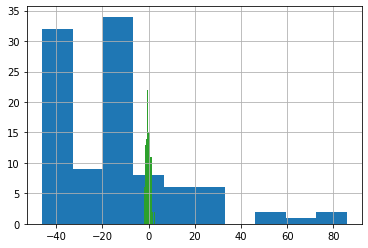

In [7]:
display(df1_tf["pull_0"].hist())
display(df1_scipy["pull_0"].hist())
display(df1_torch["pull_0"].hist())

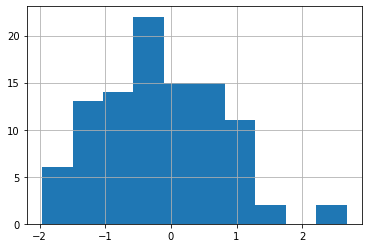

In [8]:
df1_torch["pull_0"].hist()

This seems suspicious, pytorch fitter seems to overestimate the errors

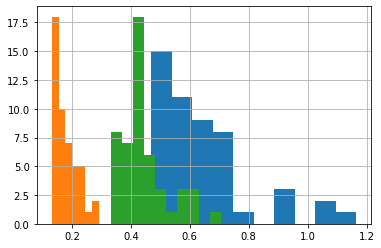

In [9]:
df1_torch.query("number_points==10000")["time"].hist()
df1_scipy.query("number_points==10000")["time"].hist()
df1_tf.query("number_points==10000")["time"].hist()

In [10]:
df2 = pd.read_pickle("benchmark_linear_eachfit.pkl")
df2.head(5)

,optimizers,number_points,weights_idx,chisq,chisq_transformed,params_0,params_1,errors_0,errors_1,fit_idx,params_true_0,params_true_1
0,Tensorflow_BFGS,1000,0,994.713,994.713,0.785965,0.981921,0.00189,0.006136,0,0.786804,0.979219
1,Tensorflow_BFGS,1000,1,994.713,994.713,0.785965,0.981921,0.00189,0.006136,0,0.786804,0.979219
2,Tensorflow_BFGS,1000,2,994.713,994.713,0.785965,0.981921,0.00189,0.006136,0,0.786804,0.979219
3,Tensorflow_BFGS,1000,3,994.713,994.713,0.785965,0.981921,0.00189,0.006136,0,0.786804,0.979219
4,Tensorflow_BFGS,1000,4,994.713,994.713,0.785965,0.981921,0.00189,0.006136,0,0.786804,0.979219
